In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import os
from pathlib import Path
import glob
from random import shuffle
import re
import cv2 as cv
import keras
import tensorflow as tf
from keras.utils import load_img, img_to_array
from PIL import Image, ImageChops
from keras.preprocessing.image import ImageDataGenerator
import random

In [2]:
# Import dataset
print(Path.cwd())
os.chdir("../")
print(Path.cwd())
print(os.listdir())

c:\Users\rasul.osmanbayli\From Github\Pneumonia-Detection\EDA
c:\Users\rasul.osmanbayli\From Github\Pneumonia-Detection
['.git', '.gitignore', '.venv', 'EDA', 'input', 'LICENSE', 'NeuralNetworks', 'Preprocessor', 'Solution 1', 'ThirdParty']


In [3]:
input_data = Path('input/chest_xray/chest_xray')

train_directory = input_data / 'train'
test_directory = input_data / 'test'
validation_directory = input_data / 'val'

train_normal_directory = train_directory / 'NORMAL'
train_pneumonia_directory = train_directory / 'PNEUMONIA'

test_normal_directory = test_directory / 'NORMAL'
test_pneumonia_directory = test_directory / 'PNEUMONIA'

validation_normal_directory = validation_directory / 'NORMAL'
validation_pneumonia_directory = validation_directory / 'PNEUMONIA'

print(train_normal_directory)
print(test_normal_directory)
print(validation_normal_directory)

input\chest_xray\chest_xray\train\NORMAL
input\chest_xray\chest_xray\test\NORMAL
input\chest_xray\chest_xray\val\NORMAL


In [4]:
def images_and_labels(list_of_directories: list, label):
    list_of_images = []
    for directory in list_of_directories:
        for img in directory.glob('*.jpeg'):
            if re.search('virus', img.name.lower()):
                list_of_images.append((os.path.abspath(img), 'virus', label))

            elif re.search('bacteria', img.name.lower()):
                list_of_images.append((os.path.abspath(img), 'bacteria', label))
            else:
                list_of_images.append((os.path.abspath(img), 'normal', label))

    return list_of_images

In [5]:
# normal cases are labeled 0
list_of_normal_cases = images_and_labels([train_normal_directory, 
                                          test_normal_directory, validation_normal_directory], 0)

# pneumonia cases are labeled 1
list_of_pneumonia_cases = images_and_labels([train_pneumonia_directory, 
                                             test_pneumonia_directory, validation_pneumonia_directory], 1)

random.seed(42)
random.shuffle(list_of_normal_cases)
random.shuffle(list_of_pneumonia_cases)

In [6]:
print(len(list_of_normal_cases), len(list_of_pneumonia_cases), "\n")
print(list_of_normal_cases[0], "\n", list_of_pneumonia_cases[0], "\n")
print(len(list_of_normal_cases[0]))

1583 4273 

('c:\\Users\\rasul.osmanbayli\\From Github\\Pneumonia-Detection\\input\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0702-0001.jpeg', 'normal', 0) 
 ('c:\\Users\\rasul.osmanbayli\\From Github\\Pneumonia-Detection\\input\\chest_xray\\chest_xray\\train\\PNEUMONIA\\person433_bacteria_1875.jpeg', 'bacteria', 1) 

3


In [7]:
# Create dataframe
df = pd.DataFrame(list_of_normal_cases + list_of_pneumonia_cases, columns=['image', 'description', 'label'])

In [8]:
# get statistics of the dataframe
print(df.head())

                                               image description  label
0  c:\Users\rasul.osmanbayli\From Github\Pneumoni...      normal      0
1  c:\Users\rasul.osmanbayli\From Github\Pneumoni...      normal      0
2  c:\Users\rasul.osmanbayli\From Github\Pneumoni...      normal      0
3  c:\Users\rasul.osmanbayli\From Github\Pneumoni...      normal      0
4  c:\Users\rasul.osmanbayli\From Github\Pneumoni...      normal      0


In [9]:
print(df.tail())

                                                  image description  label
5851  c:\Users\rasul.osmanbayli\From Github\Pneumoni...    bacteria      1
5852  c:\Users\rasul.osmanbayli\From Github\Pneumoni...       virus      1
5853  c:\Users\rasul.osmanbayli\From Github\Pneumoni...    bacteria      1
5854  c:\Users\rasul.osmanbayli\From Github\Pneumoni...       virus      1
5855  c:\Users\rasul.osmanbayli\From Github\Pneumoni...    bacteria      1


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        5856 non-null   object
 1   description  5856 non-null   object
 2   label        5856 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 137.4+ KB
None


In [11]:
print(df.describe())

             label
count  5856.000000
mean      0.729679
std       0.444164
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


In [12]:
print(df['label'].value_counts())

label
1    4273
0    1583
Name: count, dtype: int64


In [13]:
print(df['label'].value_counts(normalize=True))

label
1    0.729679
0    0.270321
Name: proportion, dtype: float64


In [14]:
print(df['description'].value_counts())

description
bacteria    2780
normal      1583
virus       1493
Name: count, dtype: int64


In [15]:
print(df['description'].value_counts(normalize=True))

description
bacteria    0.474727
normal      0.270321
virus       0.254952
Name: proportion, dtype: float64


In [16]:
print(df.isnull().sum())

image          0
description    0
label          0
dtype: int64


In [17]:
print(df.isna().sum())

image          0
description    0
label          0
dtype: int64


In [18]:
print(df.sample(5))

                                                  image description  label
4335  c:\Users\rasul.osmanbayli\From Github\Pneumoni...       virus      1
729   c:\Users\rasul.osmanbayli\From Github\Pneumoni...      normal      0
3287  c:\Users\rasul.osmanbayli\From Github\Pneumoni...       virus      1
1870  c:\Users\rasul.osmanbayli\From Github\Pneumoni...       virus      1
5633  c:\Users\rasul.osmanbayli\From Github\Pneumoni...    bacteria      1


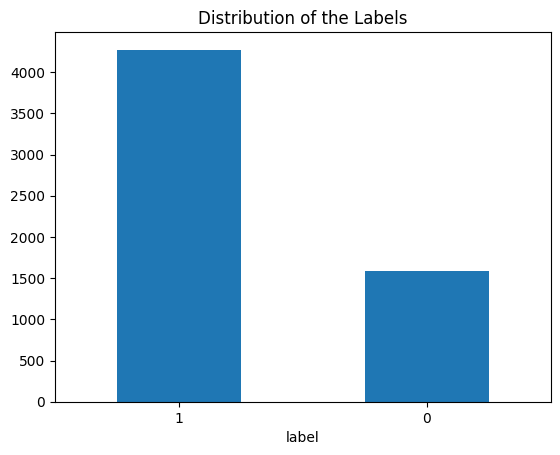

In [19]:
# Plot the distribution of the labels
df['label'].value_counts().plot(kind='bar', rot=0)
plt.title('Distribution of the Labels')
plt.show()

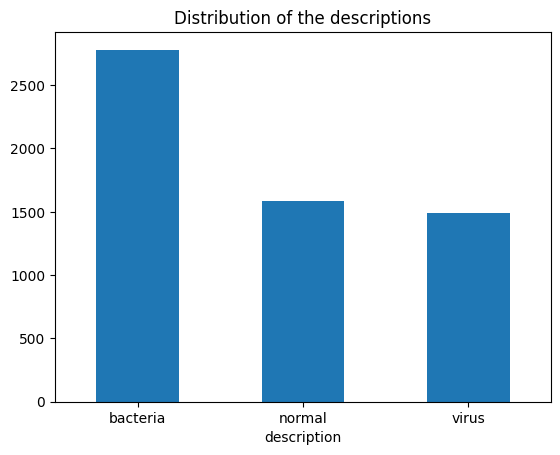

In [20]:
# Plot the distribution of the descriptions
df['description'].value_counts().plot(kind='bar', rot=0)
plt.title('Distribution of the descriptions')
plt.show()

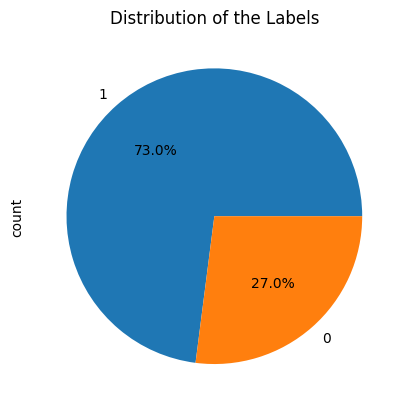

In [21]:
# Pie chart of the distribution of the labels
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of the Labels')
plt.show()

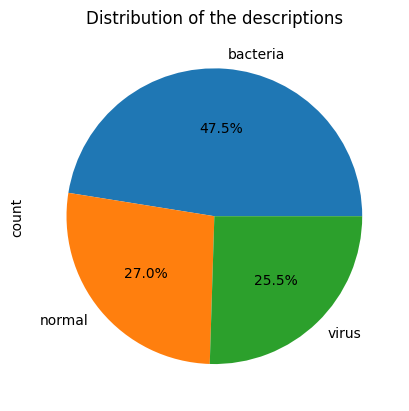

In [22]:
# Pie chart of the distribution of the descriptions
df['description'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of the descriptions')
plt.show()

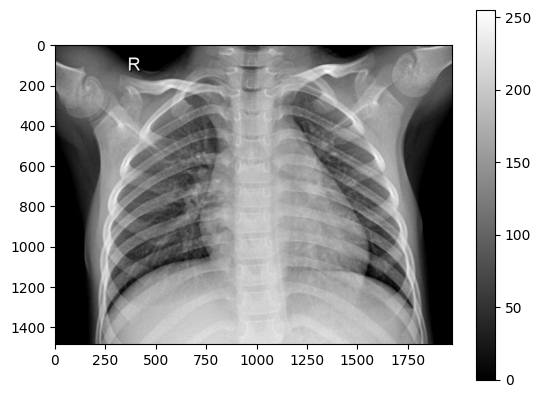

In [23]:
# Pixel distribution of the images
img = plt.imread(df['image'][0])
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

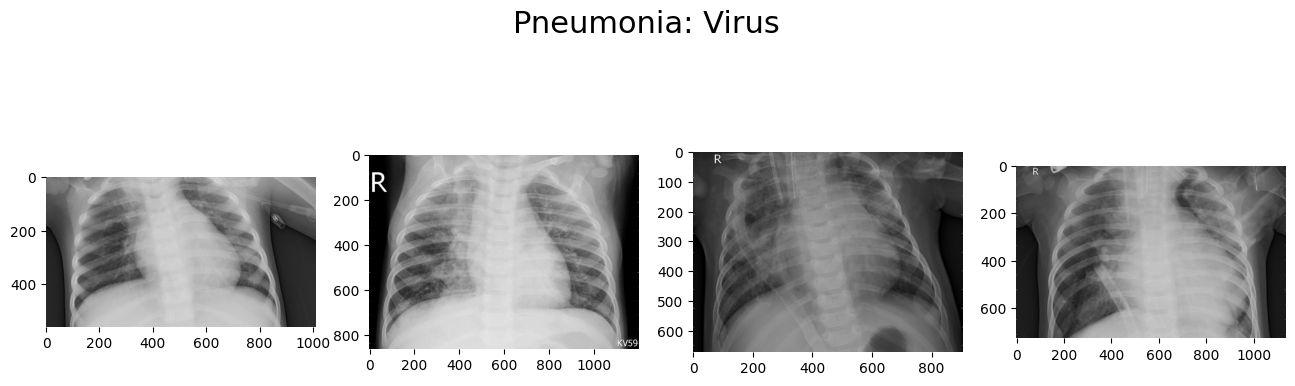

In [24]:
fig = plt.figure(figsize=(16, 5))
fig.suptitle('Pneumonia: Virus', size=22)

for i, img in enumerate(df[df['description'] == 'virus']['image'][:4]):
    img = plt.imread(img)
    plt.subplot(1, 4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
plt.show()

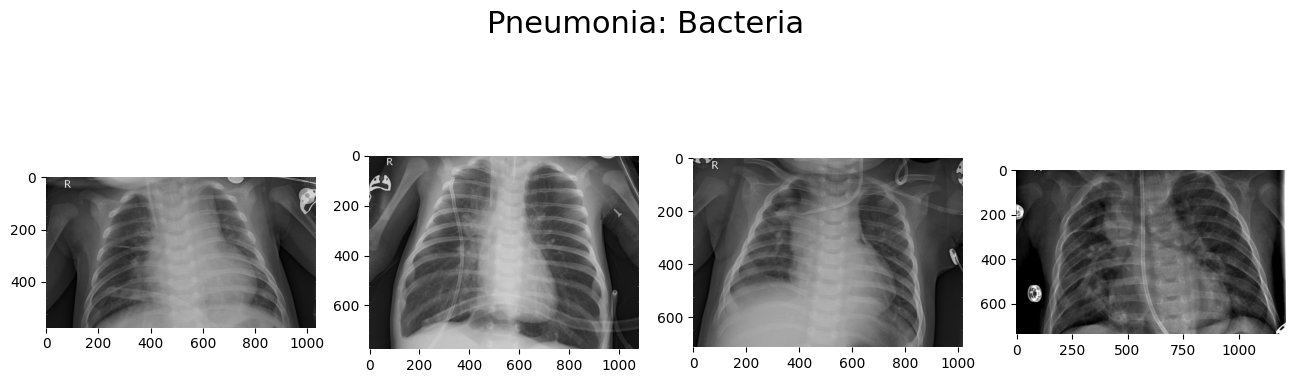

In [25]:
fig = plt.figure(figsize=(16, 5))
fig.suptitle('Pneumonia: Bacteria', size=22)

for i, img in enumerate(df[df['description'] == 'bacteria']['image'][:4]):
    img = plt.imread(img)
    plt.subplot(1, 4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
plt.show()

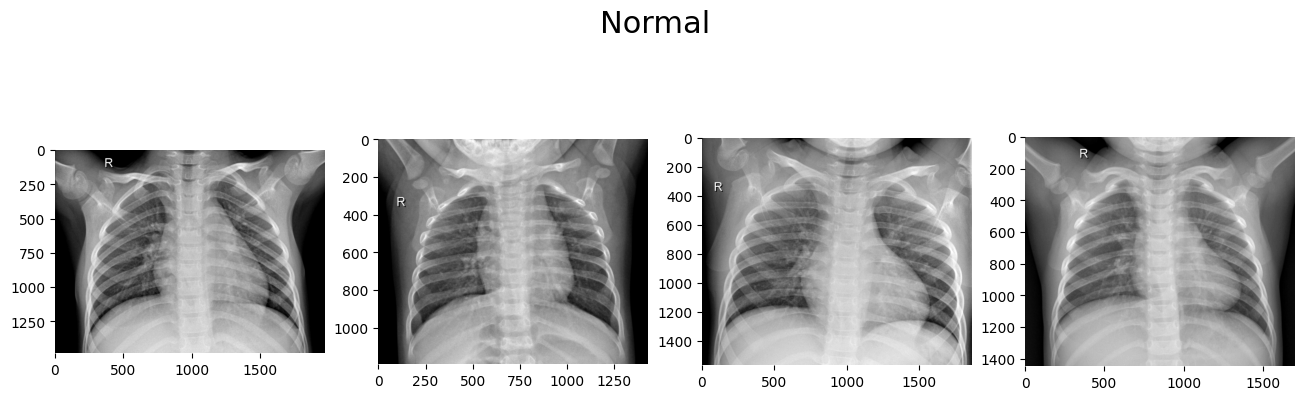

In [26]:
fig = plt.figure(figsize=(16, 5))
fig.suptitle('Normal', size=22)

for i, img in enumerate(df[df['description'] == 'normal']['image'][:4]):
    img = plt.imread(img)
    plt.subplot(1, 4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
plt.show()

In [27]:
def resize_images(input_list: list, size_of_images: tuple):

    if input_list == []:
        print("Input list is empty")
        return

    if size_of_images[0] <= 0 or size_of_images[1] <= 0:
        print("Size of images is invalid")
        return
    
    if len(input_list[0]) != 3:
        print("Input list elements should have 3 attributes")
        return

    resized_images = []
    errors = []
    for i in range(len(input_list)):
        try:
            img_array = cv.imread(input_list[i][0], cv.IMREAD_GRAYSCALE)
            resized_image = cv.resize(img_array, size_of_images)
            resized_images.append([resized_image, input_list[i][1], input_list[i][2]])
        except Exception as e:
            print(e)
            errors.append([input_list[i][0], input_list[i][1], input_list[i][2]])
            resized_images.append([None, input_list[i][1], input_list[i][2]])
            continue 
    
    
    print("Resizing finished")
    print("Number of images: ", len(resized_images))
    print("Shape of images: ", resized_images[0][0].shape)
    print("Number of errors: ", len(errors))
    print("Errors: ", errors)

    for i in range(len(errors)):
        print(errors[i][0], errors[i][1], errors[i][2])

    return resized_images

In [28]:
print(list_of_normal_cases[0][0])
print(list_of_normal_cases[0][1])
print(list_of_normal_cases[0][2])

normal_cases = resize_images(list_of_normal_cases, (150, 150))
pneumonia_cases = resize_images(list_of_pneumonia_cases, (150, 150))

c:\Users\rasul.osmanbayli\From Github\Pneumonia-Detection\input\chest_xray\chest_xray\train\NORMAL\IM-0702-0001.jpeg
normal
0
Resizing finished
Number of images:  1583
Shape of images:  (150, 150)
Number of errors:  0
Errors:  []
Resizing finished
Number of images:  4273
Shape of images:  (150, 150)
Number of errors:  0
Errors:  []


In [29]:
print(normal_cases[0][1])
print(normal_cases[0][2])

normal
0


In [30]:
resized_images_directory = Path('input/chest_xray_resized').absolute()
resized_images_directory.mkdir(exist_ok=True)

normal_resized_directory = resized_images_directory / 'Normal'
normal_resized_directory.mkdir(exist_ok=True)

pneumonia_resized_directory = resized_images_directory / 'Pneumonia'
pneumonia_resized_directory.mkdir(exist_ok=True)

In [31]:
print("normal_dir: ", normal_resized_directory)
print("pneumonia_dir: ", pneumonia_resized_directory)
print(f"{normal_resized_directory}/{normal_cases[0][1]}_{normal_cases[0][2]}.jpeg")
print(len(normal_cases))
print(f"{pneumonia_resized_directory}/{pneumonia_cases[0][1]}_{pneumonia_cases[0][2]}.jpeg")

normal_dir:  c:\Users\rasul.osmanbayli\From Github\Pneumonia-Detection\input\chest_xray_resized\Normal
pneumonia_dir:  c:\Users\rasul.osmanbayli\From Github\Pneumonia-Detection\input\chest_xray_resized\Pneumonia
c:\Users\rasul.osmanbayli\From Github\Pneumonia-Detection\input\chest_xray_resized\Normal/normal_0.jpeg
1583
c:\Users\rasul.osmanbayli\From Github\Pneumonia-Detection\input\chest_xray_resized\Pneumonia/bacteria_1.jpeg


In [32]:
for i in range(len(normal_cases)):
    if not cv.imwrite(f"{normal_resized_directory}\IMG{i}_{normal_cases[i][1]}_{normal_cases[i][2]}.jpeg", normal_cases[i][0]):
        raise Exception(f"Could not write image: {normal_resized_directory}\IMG{i}_{normal_cases[i][1]}_{normal_cases[i][2]}.jpeg")

In [33]:
for i in range(len(pneumonia_cases)):
    if not cv.imwrite(f"{pneumonia_resized_directory}\IMG{i}_{pneumonia_cases[i][1]}_{pneumonia_cases[i][2]}.jpeg", pneumonia_cases[i][0]):
        raise Exception(f"Could not write image: {pneumonia_resized_directory}\IMG{i}_{pneumonia_cases[i][1]}_{pneumonia_cases[i][2]}.jpeg")

In [34]:
list_of_normal_cases_resized = images_and_labels([normal_resized_directory], 0)

# pneumonia cases are labeled 1
list_of_pneumonia_cases_resized = images_and_labels([pneumonia_resized_directory], 1)

print("Number of normal cases: ", len(list_of_normal_cases_resized))
print("Number of pneumonia cases: ", len(list_of_pneumonia_cases_resized))

Number of normal cases:  1583
Number of pneumonia cases:  4273


In [35]:
# Create dataframe from resized images
df_new = pd.DataFrame(list_of_normal_cases_resized + list_of_pneumonia_cases_resized, columns=['image', 'description', 'label'])

In [36]:
print(df_new.head())

                                               image description  label
0  c:\Users\rasul.osmanbayli\From Github\Pneumoni...      normal      0
1  c:\Users\rasul.osmanbayli\From Github\Pneumoni...      normal      0
2  c:\Users\rasul.osmanbayli\From Github\Pneumoni...      normal      0
3  c:\Users\rasul.osmanbayli\From Github\Pneumoni...      normal      0
4  c:\Users\rasul.osmanbayli\From Github\Pneumoni...      normal      0


In [37]:
print(df_new.tail())

                                                  image description  label
5851  c:\Users\rasul.osmanbayli\From Github\Pneumoni...    bacteria      1
5852  c:\Users\rasul.osmanbayli\From Github\Pneumoni...    bacteria      1
5853  c:\Users\rasul.osmanbayli\From Github\Pneumoni...       virus      1
5854  c:\Users\rasul.osmanbayli\From Github\Pneumoni...    bacteria      1
5855  c:\Users\rasul.osmanbayli\From Github\Pneumoni...    bacteria      1


In [38]:
print(df_new.sample(5))

                                                  image description  label
5519  c:\Users\rasul.osmanbayli\From Github\Pneumoni...    bacteria      1
2482  c:\Users\rasul.osmanbayli\From Github\Pneumoni...       virus      1
5500  c:\Users\rasul.osmanbayli\From Github\Pneumoni...    bacteria      1
4134  c:\Users\rasul.osmanbayli\From Github\Pneumoni...    bacteria      1
3350  c:\Users\rasul.osmanbayli\From Github\Pneumoni...       virus      1


In [39]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        5856 non-null   object
 1   description  5856 non-null   object
 2   label        5856 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 137.4+ KB
None


In [40]:
print(df_new.describe())

             label
count  5856.000000
mean      0.729679
std       0.444164
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


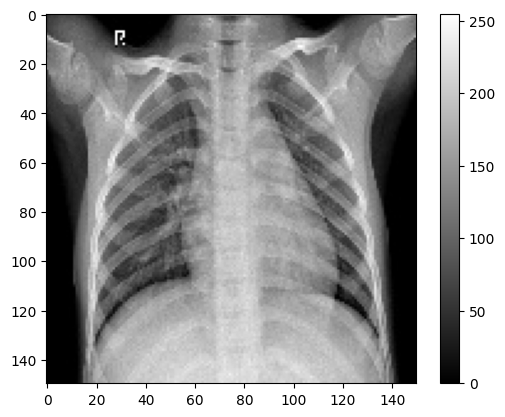

In [41]:
# Pixel distribution of the images
img = plt.imread(df_new['image'][0])
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

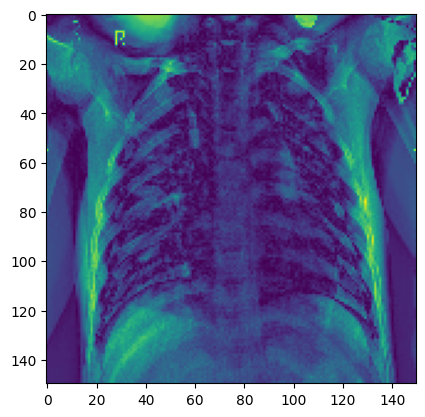

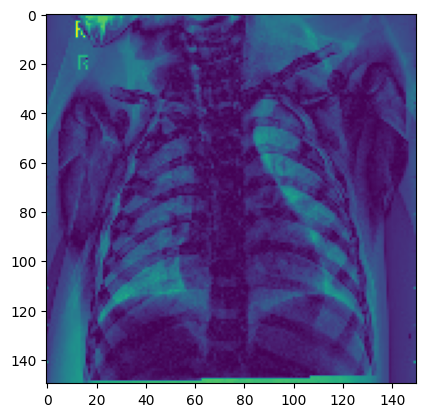

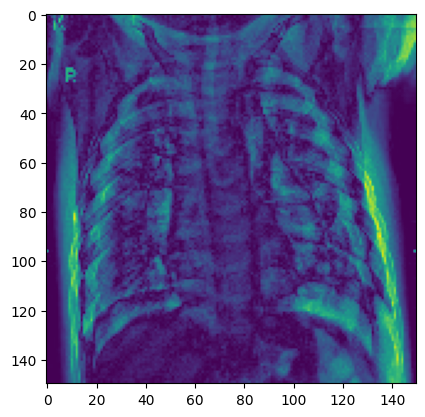

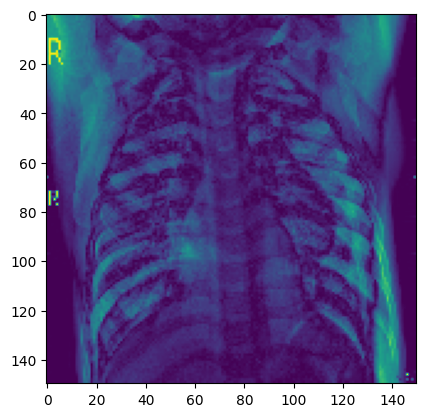

In [42]:
# Finding difference between the normal and pneumonia cases
diff_directory = Path('input/diff_images').absolute()
diff_directory.mkdir(exist_ok=True)

for i in range(4):
    img1 = Image.open(list_of_normal_cases_resized[i][0])
    img2 = Image.open(list_of_pneumonia_cases_resized[i][0])

    diff = ImageChops.difference(img1, img2)

    diff.save(f"{diff_directory}/diff{i}.png")
    plt.imshow(plt.imread(f"{diff_directory}/diff{i}.png"))
    plt.show()

In [43]:
def show_pixel_distribution(sample_normal_img, title, combined=False):

    sns.distplot(sample_normal_img.ravel(),
                label=f"Pixel Mean {np.mean(sample_normal_img):.4f} and Standard Deviation {np.std(sample_normal_img):.4f}", kde=False)
    plt.legend(loc='upper center')
    plt.title(f'Distribution of Pixel Intensities in the {title} Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('# Pixels in Image')

    if not combined:
        plt.show()

<ipython-input-43-9ac716c34f12>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_normal_img.ravel(),


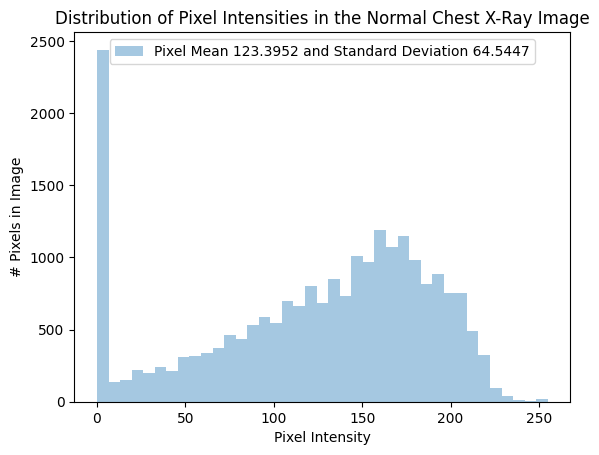

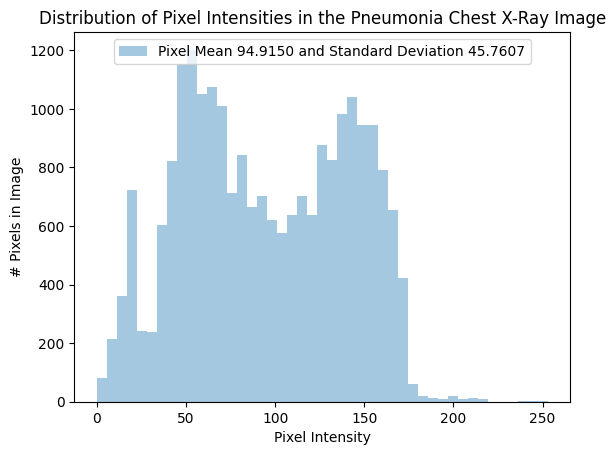

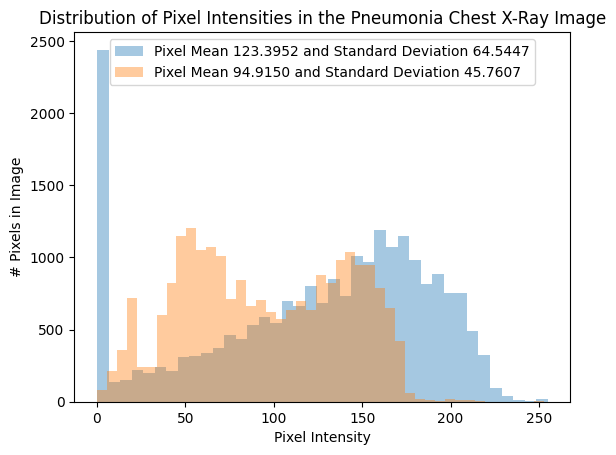

In [44]:
sample_normal_img = plt.imread(list_of_normal_cases_resized[0][0])
sample_pneumonia_img = plt.imread(list_of_pneumonia_cases_resized[0][0])

show_pixel_distribution(sample_normal_img, 'Normal Chest X-Ray')
show_pixel_distribution(sample_pneumonia_img, 'Pneumonia Chest X-Ray')


show_pixel_distribution(sample_normal_img, 'Normal Chest X-Ray', combined=True)
show_pixel_distribution(sample_pneumonia_img, 'Pneumonia Chest X-Ray', combined=True)
plt.show()

In [45]:
# Augmenting normal images
normal_augmented_directory = resized_images_directory / 'Normal_Augmented'
normal_augmented_directory.mkdir(exist_ok=True)
print(normal_augmented_directory)

image_generator = ImageDataGenerator(rotation_range=10, 
                                     width_shift_range=0.1, 
                                     height_shift_range=0.1, 
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     samplewise_center=True,
                                     samplewise_std_normalization=True)

c:\Users\rasul.osmanbayli\From Github\Pneumonia-Detection\input\chest_xray_resized\Normal_Augmented


In [46]:
print(normal_resized_directory)
path = Path(normal_resized_directory).parent.absolute()
print(path)

c:\Users\rasul.osmanbayli\From Github\Pneumonia-Detection\input\chest_xray_resized\Normal
c:\Users\rasul.osmanbayli\From Github\Pneumonia-Detection\input\chest_xray_resized


In [47]:
# Augmenting normal images
# You need to put normal image folder inside a normal_augmented_directory
normal_generated = image_generator.flow_from_directory(
    normal_augmented_directory,
    batch_size=20,
    save_to_dir=normal_augmented_directory,
    save_prefix='aug_',
    save_format='jpeg',
    class_mode='input',
    shuffle=True,
    target_size=(150, 150)
)

Found 1583 images belonging to 1 classes.


In [48]:
normal_generated.next()

(array([[[[-1.3754921 , -1.3754921 , -1.3754921 ],
          [-1.3754921 , -1.3754921 , -1.3754921 ],
          [-1.3754921 , -1.3754921 , -1.3754921 ],
          ...,
          [-1.7581679 , -1.7581679 , -1.7581679 ],
          [-1.7506633 , -1.7506633 , -1.7506633 ],
          [-1.7431587 , -1.7431587 , -1.7431587 ]],
 
         [[-1.3754921 , -1.3754921 , -1.3754921 ],
          [-1.3754921 , -1.3754921 , -1.3754921 ],
          [-1.3754921 , -1.3754921 , -1.3754921 ],
          ...,
          [-1.653979  , -1.653979  , -1.653979  ],
          [-1.6359677 , -1.6359677 , -1.6359677 ],
          [-1.6179566 , -1.6179566 , -1.6179566 ]],
 
         [[-1.3754921 , -1.3754921 , -1.3754921 ],
          [-1.3754921 , -1.3754921 , -1.3754921 ],
          [-1.3754921 , -1.3754921 , -1.3754921 ],
          ...,
          [-1.4715275 , -1.4715275 , -1.4715275 ],
          [-1.4535164 , -1.4535164 , -1.4535164 ],
          [-1.4355053 , -1.4355053 , -1.4355053 ]],
 
         ...,
 
         [[-

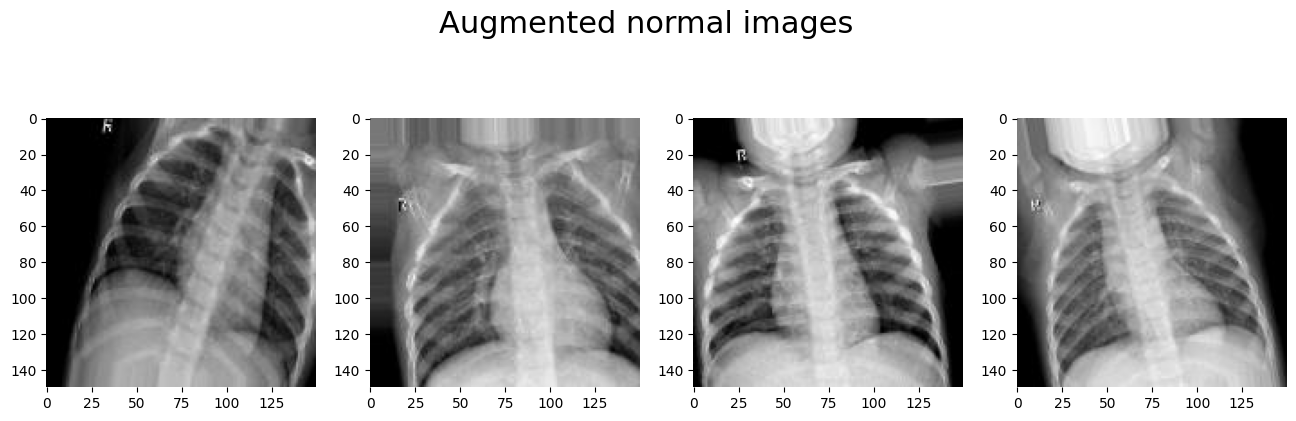

In [49]:
# Show augmented images
fig = plt.figure(figsize=(16, 5))
fig.suptitle('Augmented normal images', size=22)

for i, img in enumerate(os.listdir(normal_augmented_directory)[:4]):
    img = plt.imread(normal_augmented_directory / img)
    plt.subplot(1, 4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
plt.show()